# Rede de Petri Colorida com Contador de Tempo (EM ANÁLISE)

Este notebook implementa uma Rede de Petri Colorida (RPC) para modelagem de um projeto de construção civil, com as seguintes características:

- Ciclo completo de recursos: `Recursos_Disponiveis → Recursos_Alocados → Recursos_Disponiveis`
- Precedência controlada por lugar intermediário
- Tempo é contabilizado com um **lugar `Tempo_Projeto`** que acumula incremento a cada finalização de atividade.

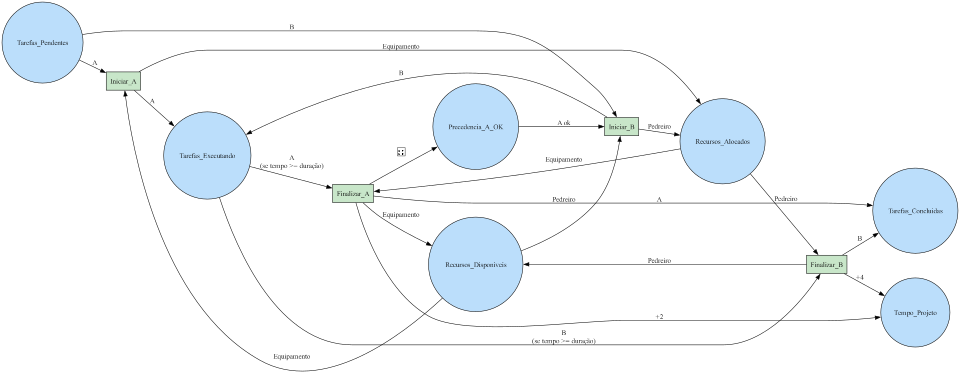

In [3]:

from graphviz import Digraph
from IPython.display import Image

dot = Digraph('RPC_Projeto_Tempo', format='png')
dot.attr(rankdir='LR', size='10')

# Estilo dos lugares e transições
place_style = {'shape': 'circle', 'style': 'filled', 'fillcolor': '#BBDEFB'}
trans_style = {'shape': 'box', 'style': 'filled', 'fillcolor': '#C8E6C9'}

# Lugares
lugares = [
    'Tarefas_Pendentes', 'Tarefas_Executando', 'Tarefas_Concluidas',
    'Recursos_Disponiveis', 'Recursos_Alocados',
    'Precedencia_A_OK', 'Tempo_Projeto'
]
for l in lugares:
    dot.node(l, **place_style)

# Transições
transicoes = ['Iniciar_A', 'Finalizar_A', 'Iniciar_B', 'Finalizar_B']
for t in transicoes:
    dot.node(t, label=t, **trans_style)

# Conexões para Atividade A
dot.edge('Tarefas_Pendentes', 'Iniciar_A', label='A')
dot.edge('Recursos_Disponiveis', 'Iniciar_A', label='Equipamento')
dot.edge('Iniciar_A', 'Tarefas_Executando', label='A')
dot.edge('Iniciar_A', 'Recursos_Alocados', label='Equipamento')

dot.edge('Tarefas_Executando', 'Finalizar_A', label='A\n(se tempo >= duração)')
dot.edge('Recursos_Alocados', 'Finalizar_A', label='Equipamento')
dot.edge('Finalizar_A', 'Tarefas_Concluidas', label='A')
dot.edge('Finalizar_A', 'Recursos_Disponiveis', label='Equipamento')
dot.edge('Finalizar_A', 'Precedencia_A_OK', label='✓')
dot.edge('Finalizar_A', 'Tempo_Projeto', label='+2')

# Conexões para Atividade B
dot.edge('Tarefas_Pendentes', 'Iniciar_B', label='B')
dot.edge('Precedencia_A_OK', 'Iniciar_B', label='A ok')
dot.edge('Recursos_Disponiveis', 'Iniciar_B', label='Pedreiro')
dot.edge('Iniciar_B', 'Tarefas_Executando', label='B')
dot.edge('Iniciar_B', 'Recursos_Alocados', label='Pedreiro')

dot.edge('Tarefas_Executando', 'Finalizar_B', label='B\n(se tempo >= duração)')
dot.edge('Recursos_Alocados', 'Finalizar_B', label='Pedreiro')
dot.edge('Finalizar_B', 'Tarefas_Concluidas', label='B')
dot.edge('Finalizar_B', 'Recursos_Disponiveis', label='Pedreiro')
dot.edge('Finalizar_B', 'Tempo_Projeto', label='+4')

# Renderizar imagem
output_path = 'rpc_construcao_tempo'
dot.render(output_path, format='png', cleanup=True)
Image(filename=output_path + '.png')
